#Введение

**Аномилии** — это редкие данные, которые вызывают большое подозрение ввиду существенного отличия от большей части данных.


Существует несколько техник выявления аномалий. Вот некотоыре из них:
* Техники, основанные на плотности (k-ближайшие соседи, локальный уровень выброса, изолирующие леса и многие другие варианты этой концепции).
* Выявление выбросов на основе кластерного анализа.
* Обнаружение выбросов на основе подпространств и на основе корреляции для данных высокой размерности.
* **Отклонения от ассоциативных правил и часто встречающихся наборов.**



#Задача

**Необохдимо** выявить ассоциативные правила в подготовленном наборе данных и применить их для поиска аномалий.  

**Датасет** содержит данные о произведенных в магазине транзакциях. Всего в датасете представлено 7502 строк - транзакций, состощих из списка товаров.  

**Бизнес задачу** можно сформулирвоать следующим образом: необохдимо обнаружить продукты, которые часто покупают вместе, чтобы более грамотно располодить продукты на полках в магазине, увеличив тем самым число их покупок.

Необохдимо обнаружить наборы продуктов, которые часто покупают вместе

#Подготовка данных

Исходный датасет:

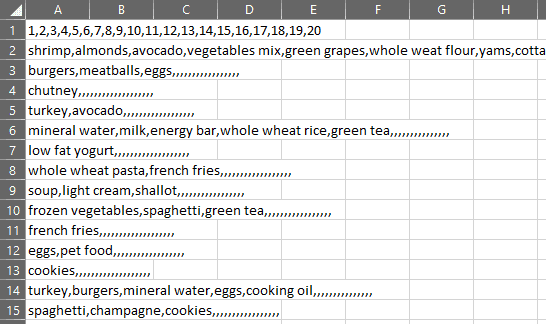

Загрузка датасета:

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Market_Basket_Optimisation.csv to Market_Basket_Optimisation.csv


Представим датасет в виде массива строк:

In [ ]:
import csv

data_list = []
with open("Market_Basket_Optimisation.csv") as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    row = [x for x in row if x] #пропускаем пустые элементы
    data_list.append(row)

Удалим первую строку из списка, т.к. в ней содержатся номера покупок, они нам не нужны:

In [ ]:
data_list.pop(0)

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20']

Библотека mlxtend:

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

Сформируем список товаров:

In [ ]:
te = TransactionEncoder()
te.fit(data_list)

print("Список товаров: {}".format(te.columns_))
print("Всего различных товаров: {}".format(len(te.columns_)))

Список товаров: ['almonds', 'antioxydant juice', 'asparagus', 'avocado', 'babies food', 'bacon', 'barbecue sauce', 'black tea', 'blueberries', 'body spray', 'bramble', 'brownies', 'bug spray', 'burger sauce', 'burgers', 'butter', 'cake', 'candy bars', 'carrots', 'cauliflower', 'cereals', 'champagne', 'chicken', 'chili', 'chocolate', 'chocolate bread', 'chutney', 'cider', 'clothes accessories', 'cookies', 'cooking oil', 'corn', 'cottage cheese', 'cream', 'dessert wine', 'eggplant', 'eggs', 'energy bar', 'energy drink', 'escalope', 'extra dark chocolate', 'flax seed', 'french fries', 'french wine', 'fresh bread', 'fresh tuna', 'fromage blanc', 'frozen smoothie', 'frozen vegetables', 'gluten free bar', 'grated cheese', 'green beans', 'green grapes', 'green tea', 'ground beef', 'gums', 'ham', 'hand protein bar', 'herb & pepper', 'honey', 'hot dogs', 'ketchup', 'light cream', 'light mayo', 'low fat yogurt', 'magazines', 'mashed potato', 'mayonnaise', 'meatballs', 'melons', 'milk', 'mineral 

Представим датасет в виде Pandas DataFrame, где столбец - это один из 119 товаров:

In [ ]:
import pandas as pd 

transactions_onehot = te.transform(data_list)

df = pd.DataFrame(transactions_onehot, columns=te.columns_)
df

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#Анализ датасета

Проанализируем частотность продуктов в датасете:

In [ ]:
frequency_list = pd.DataFrame(data=df.sum(axis=0)).reset_index().rename(columns={'index': 'item', 0: 'frequency'}).sort_values(by=['frequency'],ascending=False)
frequency_list

,item,frequency
71,mineral water,1788
36,eggs,1348
99,spaghetti,1306
42,french fries,1282
24,chocolate,1229
...,...,...
104,tea,29
10,bramble,14
33,cream,7
76,napkins,5


Основная статистика по частотности продуктов:

In [ ]:
frequency_list.describe()

,frequency
count,119.000000
mean,246.705882
std,318.361839
min,3.000000
25%,58.000000
50%,118.000000
75%,286.000000
max,1788.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6899533350>]],
      dtype=object)

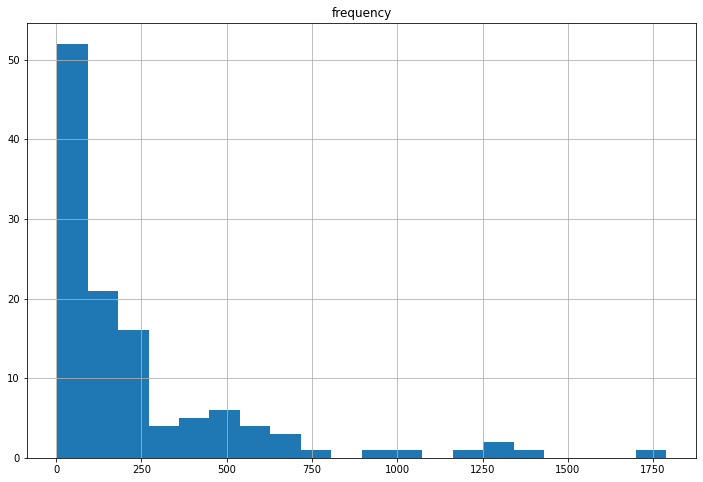

In [ ]:
frequency_list.hist(bins=20,figsize=(12,8))

**Вывод:** в датасете около 90 продуктов встречаются в транзакциях менее 250 раз. Очень мало продуктов с высой частотой.

Т.к. перед нами стоит задача выявления ассоциативных правил, то продукты с низкой частотой для нас буду являться непоказательными. 

#Ассоциативные правила

**Ассоциативное правило** — закономерность A → B , где A и B - множества продуктов в корзине. Т.е. если клиент купил набор товаров A, то с высокой вероятностью он купит набор продуктов B.

**Метрики**:
* **Support правила** - доля чеков, в которых присутсвтует и продукт A, и продукт B - *устойчивость зависимости*. Т.е. как часто имеем возможность подобное правило наблюдать.

  `support(A→B) = support(A∪B), range: [0,1]`

* **Confidence правила** - доля тех, кто купил B, среди тех, кто купил A - *сила зависимости*. Однако Сonfidence может объясняться просто большой популярностью продукта B, а вовсе не его хорошими дополняющими свойствами к продукту A.

  `confidence(A→B) = support(A→B) / support(A), range: [0,1]`

* **Lift правила** - насколько Сonfidence правила выше/ниже общей популярности продукта B. Метрика Lift решает проблему метрки Confidence.
  
  `lift(A→B) = confidence(A→B) / support(B), range: [0,∞]`

Существует множество алгоритмов, работающих с ассоциатвиными правилами. Рассмотрим три наиболее популярных: **Apriory**, **FP-Growth** и **ECLAT**.

#Алгоритм Apriori

**Описание алгоритма**

Рассмотрим дерево префиксов, где 2 элемента X и Y соединены, если X является прямым подмножеством Y. Рисунок приведен ниже:

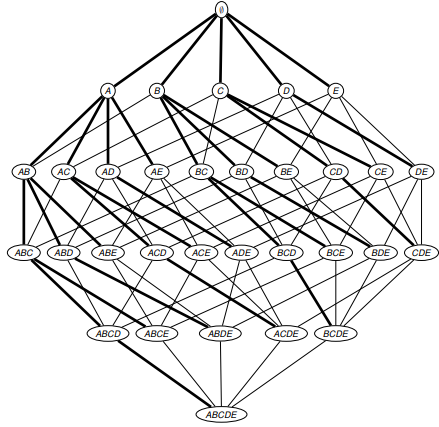

Apriori использует следующее утверждение: если $ X \subseteq Y$, то $support(X) \geq support(Y) $.

Отсюда следуют следующие 2 свойства:
* Если Y встречается часто, то любое подмножество $ X: X \subseteq Y $ так же встречается часто
* Если X встречается редко, то любое супермножество $ Y: Y \supseteq X $ так же встречается редко

Алгоритм Apriori по-уровнево проходит по префиксному дереву и рассчитывает частоту встречаемости подмножеств X в D (датасет, содержащий список транзакций). Таким образом, в соответствии с алгоритмом:
* исключаются редкие подмножества и все их супермножества
* рассчитывается support(X) для каждого подходящего кандидата X размера k на уровне k

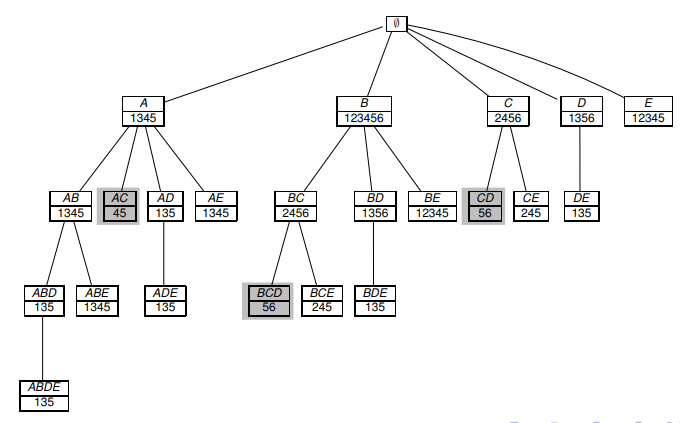

Явным минусом такого подхода является то, что необходимо «просканировать» весь датасет, посчитать все supp на всех уровнях breadth-first search (поиск в ширину)
Это также может подъесть RAM на больших датасетах, хотя алгоритм в плане скорости все равно намного эффективнее брутфорса.

**Подбор min_support**

После анализа частотности мы выяснили, что самый часто встречаемый продукт встречается 1788 раз. 

Верхняя граница min_support, начиная с которой в результате работы алгоритма будет появляться хотя бы одна запись: 1788/7501 = 0,238. 

Большая часть продуктов встречается менее 250 раз. Граница min_support: 250/7501 = 0.033. 

Более 50 продуктов имеют частоту появления меньше 80. Граница min_support: 80/7501 = 0.01.  

Нам нет смысла устанавливать слишком маленьким параметр min_support, так как в формировании наших ассоциативных правил будт участвовать большое количество товаров с низкой частотой появления. Такие правила не будут показательны.

Однако в нашем датасете большая часть продуктов имеет низкую частоту, поэтому нам придётся их откиунть и использовать лишь малую часть продуктов. Но используя эту малую часть продуктов с высокой частотой появления в транзакциях мы можем выяснить реальные взаимосвязи между покупкой продуктов

Будем считать целесообразными для участия в формировании ассоциативных правил те товары, частота появления которых выше 250. Поэтому **за min_support возьмём 0,035.**

Найдем frequent itemsets:

In [ ]:
frequent_itemsets = apriori(df, min_support=0.035, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.046794,(champagne)
3,0.059992,(chicken)
4,0.163845,(chocolate)
5,0.080389,(cookies)
6,0.051060,(cooking oil)
7,0.179709,(eggs)
8,0.079323,(escalope)
9,0.170911,(french fries)


Создадим правила ассоциации из часто используемых наборов элементов:

In [ ]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270
2,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
3,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
4,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314


В результате наших исследований мы обнаружили, что почти во всех ассоциативных правилах **в consequents находится mineral water**. Это связано с тем, что mineral water имеет очень высокую частоту покупки. Именно она является самым частым товаром с частотой 1778. 

Воспользуемся метрикой **lift**, которая решает проблему confidence:

In [ ]:
association_rules(frequent_itemsets, metric="lift", min_threshold=1.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
1,(mineral water),(ground beef),0.238368,0.098254,0.040928,0.171700,1.747522,0.017507,1.088672
2,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
3,(spaghetti),(ground beef),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716


Рассмотрим, например, **ground beef -> spaghetti**:
* support=0.04 - в 4% чеков встречаются ground beef и spaghetti
* confidence=0.39 - в 39% тех, кто купил ground beef, также купили и spaghetti
* lift=2.29 - купившие ground beef покупают spaghetti на 129% чаще, чем все остальные покупатели

**Дополнительные метрики**:
* **Leverage** - вычисляет разницу между наблюдаемой частотой совместного появления A и B и частотой, которая ожидалась бы, если бы A и B были независимыми. Значение 0 указывает на независимость.

  `levarage(A→B) = support(A→B) − support(A) × support(B), range: [−1,1]`

* **Conviction** - высокое значение означает, что B сильно зависит от A. Например, в случае оценки абсолютной достоверности знаменатель становится 0 (из-за 1 - 1), для которого оценка убежденности определяется как "inf".  
Как и в случае с lift, если предметы независимы, conviction равно 1. Если conv > 1, то правило хорошо выделяет закономерность. **Если conv < 1, то правило не просто плохо работает, а выделяет антипаттерн (что никогда не покупают вместе), и в этом случае можно ею воспользоваться для поиска несовместимых предметов и продуктов.**  
Суть метрики - как соотносится популярность других товаров (не B) с частотой ситуации, когда правило не срабатывает. 

  `conviction(A→B) = (1 − support(B)) / (1−confidence(A→B)), range: [0,∞]`

Продемонстрируем ситуацию, когда мы используем слишком слабые ассоциативные правила. Для этого установим min_support=0.01:

In [ ]:
tets_frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

In [ ]:
test_rules = association_rules(tets_frequent_itemsets, metric="confidence", min_threshold=0.1)
test_rules.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
315,(olive oil),"(spaghetti, mineral water)",0.065858,0.059725,0.010265,0.155870,2.609786,0.006332,1.113898
316,"(pancakes, spaghetti)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557
317,"(pancakes, mineral water)",(spaghetti),0.033729,0.174110,0.011465,0.339921,1.952333,0.005593,1.251198
318,"(spaghetti, mineral water)",(pancakes),0.059725,0.095054,0.011465,0.191964,2.019529,0.005788,1.119933
319,(pancakes),"(spaghetti, mineral water)",0.095054,0.059725,0.011465,0.120617,2.019529,0.005788,1.069244


Антипатерны:

In [ ]:
test_rules[(test_rules['conviction'] < 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
52,(cookies),(chocolate),0.080389,0.163845,0.010399,0.129353,0.789486,-0.002773,0.960384
86,(cookies),(eggs),0.080389,0.179709,0.010532,0.131012,0.729019,-0.003915,0.943960
87,(cookies),(french fries),0.080389,0.170911,0.013332,0.165837,0.970317,-0.000408,0.993918
93,(escalope),(eggs),0.079323,0.179709,0.011065,0.139496,0.776230,-0.003190,0.953267
96,(frozen smoothie),(eggs),0.063325,0.179709,0.011065,0.174737,0.972330,-0.000315,0.993975
115,(tomatoes),(eggs),0.068391,0.179709,0.012265,0.179337,0.997929,-0.000025,0.999547
120,(escalope),(mineral water),0.079323,0.238368,0.017064,0.215126,0.902495,-0.001844,0.970387
128,(ground beef),(french fries),0.098254,0.170911,0.013865,0.141113,0.825652,-0.002928,0.965306
132,(mineral water),(french fries),0.238368,0.170911,0.033729,0.141499,0.827912,-0.007011,0.965741
133,(french fries),(mineral water),0.170911,0.238368,0.033729,0.197348,0.827912,-0.007011,0.948894


**Вывод**

Существует довольно неплохая связь между spaghetti и ground beef. 

Также существует несколько ассоциативных правил с довольно неплохими параметрами, однако в них в consequents стоит mineral water, которая является очень частой. Поэтому сложно сказать, что здесь дело в связи между продуктами,а не просто в высокой частоте mineral water.

# Алгоритм FP-growth

Сущетсвует ещё один распространённый алгоритм для работы с ассоциативными правилами — FP-Growth.

FP-Growth предлагает отказаться от генерации кандидатов (генерация кандидатов лежит в основе Apriori). Теоретически, такой подход позволит еще больше увеличить скорость алгоритма и использовать еще меньше памяти.

Это достигается за счет хранения в памяти префиксного дерева (trie) не из комбинаций кандидатов, а из самих транзакций.

При этом FP-Growth генерирует таблицу заголовков для каждого item, чей support выше заданного пользователем. Эта таблица заголовков хранит связанный список всех однотипных узлов префиксного дерева.

Попробуем применить его:

In [ ]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
fpg_frequent_itemsets = fpgrowth(df, min_support=0.035, use_colnames=True)
fpg_frequent_itemsets

,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.047460,(honey)
7,0.042528,(salmon)
8,0.179709,(eggs)
9,0.087188,(burgers)


In [ ]:
association_rules(fpg_frequent_itemsets, metric="confidence", min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
1,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
2,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270
3,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
4,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
5,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997


In [ ]:
association_rules(fpg_frequent_itemsets, metric="lift", min_threshold=1.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mineral water),(ground beef),0.238368,0.098254,0.040928,0.171700,1.747522,0.017507,1.088672
1,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
2,(spaghetti),(ground beef),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716
3,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997


**Вывод**

Все рассуждения проведённые для алгоритма Apriory справедливы и для FP-Growth. Причём оба алгоритма выдают одинаковые результаты.

#Алгоритм ECLAT

Алгоритм ECLAT — алгоритм поиска глубины, основанный на пересечении множеств. Он подходит как для последовательного, так и для параллельного выполнения с свойствами, улучшающими локальность.

Алгоритм Eclat используется для выполнения интеллектуального анализа наборов элементов. Майнинг наборов предметов позволяет нам находить частые закономерности в данных.

например:
- если потребитель покупает молоко, он также покупает хлеб. Этот тип шаблона называется ассоциативными правилами и используется во многих доменах приложений.

Основная идея алгоритма eclat заключается в:
- использовании пересечений tidset (транзакций) для вычисления поддержки набора элементов-кандидатов, избегая генерации подмножеств, которые не существуют в дереве префиксов. Первоначально он был предложен Заки, Партхасарати и др.

Идея алгоритма ECLAT (Equivalence Class Transformation) заключается в ускорении подсчета supp(X). Для этого нам необходимо проиндексировать нашу базу данных D так, чтобы это позволило быстро рассчитывать supp(X)

##Алгоритм

- Алгоритм ECLAT определяется рекурсивно.
- Начальный вызов использует все отдельные элементы с их транзакциями.
- В каждом рекурсивном вызове функция IntersectTidsets проверяет каждую пару itemset-tidset  со всеми остальными парами для генерации новых кандидатов.
- Если новый кандидат является частым, он добавляется в набор.
- Затем, рекурсивно, он находит все частые наборы элементов в X ветку.
- Алгоритм выполняет поиск в режиме DFS, чтобы найти все частые наборы.

##Вариации

PPV, PrePost и АЛГОРИТМ FIN

- Эти три алгоритма были предложены Deng et al и основаны на трех новых структурах данных, называемых Node-list, N-list и Nodeset соответственно, для облегчения процесса интеллектуального анализа частых наборов элементов.
- Они представляют собой наборы узлов в FP-дереве с кодировкой каждого узла с обходом предварительного заказа и обходом после заказа.
- По сравнению с Node-lists, N-списки и Nodesets более эффективны. Это приводит к тому, что эффективность PrePost и FIN выше, чем у PPV.

В отличие от Apriori-алгоритма, ECLAT производит поиск в глубину (DFS). Иногда его называют «вертикальным» (в отличие от «горизонтального» для Apriori)

##Реализация

Устанавливаем библиотеку:

In [3]:
import pandas as pd

In [1]:
!pip install pyECLAT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Заново загрузим данные и сразу представим их в виде Pandas Dataframe:

In [8]:
data = pd.read_csv("Market_Basket_Optimisation.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Применим ECLAT:

In [11]:
from pyECLAT import ECLAT
eclat_instance = ECLAT(data=data, verbose=True)

100%|██████████| 120/120 [00:00<00:00, 2804.79it/s]


После получения eclat_instance автоматически генерируется двоичный фрейм данных, среди других ресурсов, к которым можно получить доступ:

- Здесь уустановлены соответственно числа 1 есть данный объект в транзации или 0, если нет
- плюс в отличие от других алгоритмов, что транзакции автоматически декодируются

In [12]:
eclat_instance.df_bin

,almonds,spinach,frozen smoothie,red wine,fresh tuna,french wine,light cream,bug spray,burger sauce,yams,...,zucchini,black tea,cottage cheese,gums,carrots,oil,chocolate bread,green tea,ketchup,rice
0,1,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Тут показаны уникальные поля, которые нашёл алгоритм:

In [13]:
eclat_instance.uniq_

['almonds',
 nan,
 'spinach',
 'frozen smoothie',
 'red wine',
 'fresh tuna',
 'french wine',
 'light cream',
 'bug spray',
 'burger sauce',
 'yams',
 'whole wheat rice',
 'oatmeal',
 'magazines',
 'chicken',
 'champagne',
 'ham',
 'honey',
 'burgers',
 'parmesan cheese',
 'tomatoes',
 'dessert wine',
 'yogurt cake',
 'strawberries',
 'mint green tea',
 'pepper',
 'eggplant',
 'butter',
 'mayonnaise',
 'candy bars',
 'flax seed',
 'meatballs',
 'toothpaste',
 ' asparagus',
 'chili',
 'avocado',
 'cooking oil',
 'salt',
 'nonfat milk',
 'energy bar',
 'cookies',
 'sandwich',
 'escalope',
 'low fat yogurt',
 'shampoo',
 'body spray',
 'brownies',
 'cake',
 'sparkling water',
 'hot dogs',
 'clothes accessories',
 'cauliflower',
 'cream',
 'pickles',
 'pet food',
 'soda',
 'spaghetti',
 'vegetables mix',
 'chocolate',
 'napkins',
 'pancakes',
 'pasta',
 'babies food',
 'white wine',
 'olive oil',
 'gluten free bar',
 'green grapes',
 'bacon',
 'blueberries',
 'tea',
 'salad',
 'water spray

Генерируем правила с помощью ECLAT:

- можно установить также, как и в apriori минимальный support
- можно установить минимальную и максимальную комбинацию элементов, чего нет в предыдущих (у них максимум комбинаций 2)

In [16]:
rule_indices, rule_supports = eclat_instance.fit(min_support=0.035,
                                                 min_combination=2,
                                                 max_combination=3,
                                                 separator=' & ',
                                                 verbose=True)

Combination 2 by 2


435it [00:04, 104.61it/s]


Combination 3 by 3


4060it [00:30, 131.78it/s]


- Минус того, что большое количество комбинаций будтет долго отрабатывать

Здесь представлены индексы комбинаций 'chocolate & mineral water':

In [ ]:
rule_indices.get('chocolate & mineral water')

Здесь представлены support при данных комбинациях:

In [17]:
rule_supports

{'chocolate & mineral water': 0.05265964538061592,
 'french fries & eggs': 0.036395147313691506,
 'frozen vegetables & mineral water': 0.03572856952406346,
 'mineral water & eggs': 0.05092654312758299,
 'mineral water & ground beef': 0.040927876283162246,
 'mineral water & milk': 0.04799360085321957,
 'spaghetti & chocolate': 0.03919477403012932,
 'spaghetti & eggs': 0.036528462871617116,
 'spaghetti & ground beef': 0.03919477403012932,
 'spaghetti & milk': 0.03546193840821224,
 'spaghetti & mineral water': 0.05972536995067324}

Доступ к документации, а также описанию каждого метода можно получить, используя:

In [ ]:
help(eclat_instance.fit)
help(eclat_instance.fit_all)
help(eclat_instance.support)

#Другие алгоритмы

Другие алгоритмы:
- AprioriDP (Dynamic Programming) — позволяет хранить supp в специальной структуре данных, работает немного быстрее классического Apriori

- FP Bonsai — улучшенный FP-Growth с обрезкой префиксного дерева (пример алгоритма с ограничениями)

- Основанный на контексте алгоритм поиска ассоциативных правил.
CBPNARM — это алгоритм, разработанный в 2013, для обнаружения ассоциированных правил на базе контекста. Алгоритм использует контекстную переменную, на основе которой значение поддержки набора объекта меняется и на основе этого правила переносятся в множество правил.

- Алгоритмы на основе множества узлов
FIN, PrePost и PPV — это три алгоритма, основанные на множествах узлов. Они используют узлы в кодировании FP-дерева для представления наборов объектов и поддерживают стратегию поиска в глубину для обнаружения часто встречающихся наборов объектов с помощью «пересечения» наборов узлов.

- Процедура ASSOC метода GUHA
GUHA — это общий метод анализа данных, который имеет теоретические основы. Процедура ASSOC является методом GUHA, который ищет общие ассоциативные правила, используя быстрые операции над битовыми строками. Ассоциативные правила, выявленные этим методом, более общие, чем полученные методом Apriori, например, «объекты» могут быть связаны как конъюнкцией, так и дизъюнкцией и связь между левой частью и правой частью правила не ограничена установкой минимальных значений поддержки и доверия как в методе Apriori — может быть использована произвольная комбинация мер интересности.

- Поиск OPUS. OPUS является эффективным алгоритмом для обнаружения правил, который, в отличие от многих альтернатив, не требует ограничения ни монотонности, ни антимонотонности, таких как в минимуме поддержки. Поиск OPUS является базовой технологий в популярной системе поиска ассоциаций Magnum Opus.

#Ссылки

https://habr.com/ru/post/66016/?ysclid=l3qfmutiwm


https://en.wikipedia.org/wiki/Association_rule_learning

https://www.geeksforgeeks.org/learn-one-rule-algorithm/

http://rasbt.github.io/mlxtend/user_guide/classifier/OneRClassifier/

https://habr.com/ru/company/ods/blog/353502/?ysclid=l3qjtxs4vv

https://pypi.org/project/pyECLAT/

https://loginom.ru/blog/fpg?ysclid=l3qfmjmhn8

https://pypi.org/project/spmf/

http://www.philippe-fournier-viger.com/spmf/index.php?link=documentation.php